## Importing and reading data

In [345]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
DATA_URL="datasets/"

In [346]:
# winequality-red.csv is a ';' separated csv file.
red_wine = pd.read_csv(DATA_URL+"winequality-red.csv",sep=',')
white_wine=pd.read_csv(DATA_URL+"winequality-white.csv",sep=',')

In [347]:
# 'Type' is being added to both Red Wine & White Wine to group data in case there's a difference between the two types. 

In [348]:
df_red = red_wine
df_red['type']='Red'

In [349]:
df_white = white_wine
df_white['type']='white'

In [350]:
# Review Datasets
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red


In [351]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [352]:
white_wine.shape

(4898, 13)

In [353]:
red_wine.shape

(1599, 13)

In [354]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [355]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [356]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                                  if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])

# merge red and white wine datasets
wines = pd.concat([red_wine,white_wine])   # concatenating horizontally since by default axis=0

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

### Studying the data

In [357]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,NaN
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,Red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,NaN
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,NaN
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,NaN


In [358]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  type                  6497 non-null   object  
 13  quality_label         1599 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [359]:
wines.shape

(6497, 14)

In [360]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525473,115.744728,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749313,56.521751,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Analizing and Visualizing data


In [361]:
sorted(wines['quality'].unique())

[3, 4, 5, 6, 7, 8, 9]

#### Barplot is chosen since the wine quality is limited to certain values. Despite being similar to continuous data, it's more more similar to categorical ones. Using barplot can give us a better overview with the distribution. Other data is being plot as distplot.

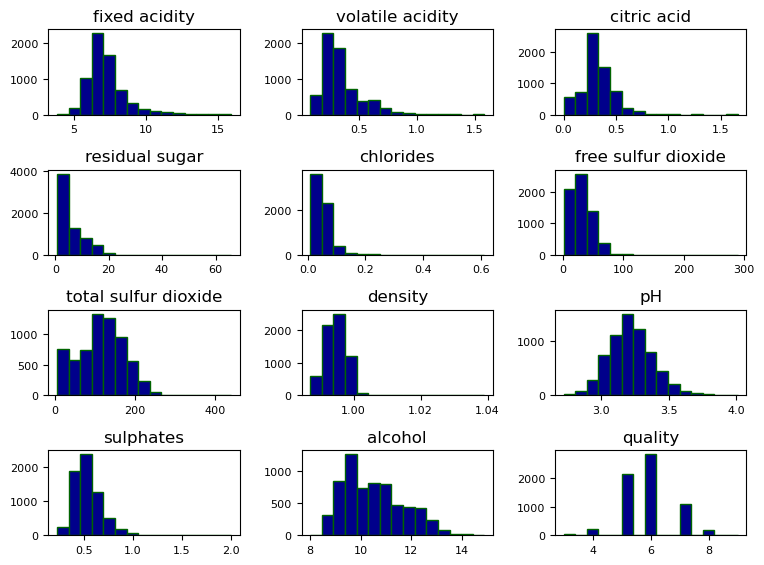

In [362]:
wines.hist(bins=15, color='DarkBlue', edgecolor='DarkGreen', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)

# command to give space b/t diff. plots 
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

In [363]:

count_cat = wines.nunique() # it shows us how much unique examples we have in each feature

In [364]:
wines["type"].value_counts() # it let us understand the number of the examples 

white    4898
Red      1599
Name: type, dtype: int64

In [365]:
# The distribution of the examples in our dataset
wines['type'].value_counts("white")*100 # in %
wines['type'].value_counts("red")*100 # in %

white    75.388641
Red      24.611359
Name: type, dtype: float64

In [366]:
count_cat

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     133
total sulfur dioxide    275
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
type                      2
quality_label             3
dtype: int64

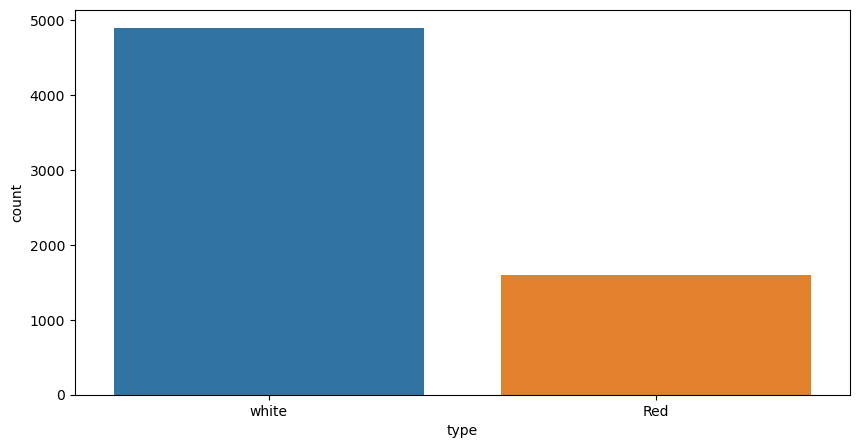

In [367]:
plt.figure(figsize = (10,5))
sns.countplot(x = wines['type']); # illustration

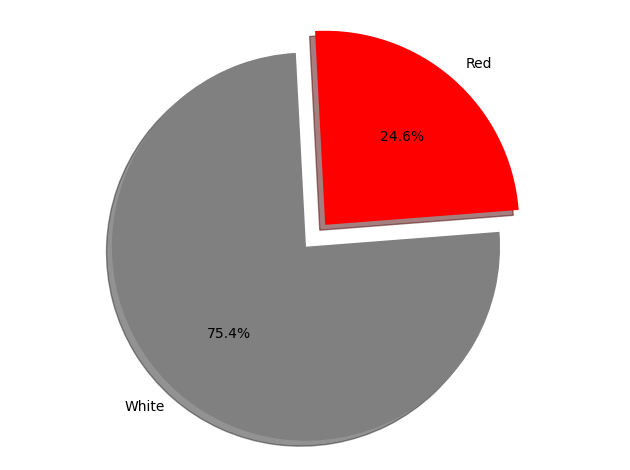

In [368]:
# wine divisions according to types
# Pie chart
labels = ['White', 'Red'] # every label represnts a type
pie_x = 0.753886 # the distribution
pie_y = 0.246114 # the distribution
sizes = [pie_x,pie_y] # we have two types and their distribution
explode = (0, 0.15) # the distance between the pic slicers
col_pie = ["Grey","red"] # for the colors
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=col_pie, autopct='%1.1f%%',
        shadow=True, startangle=93)
# equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### Obtained wine quality:

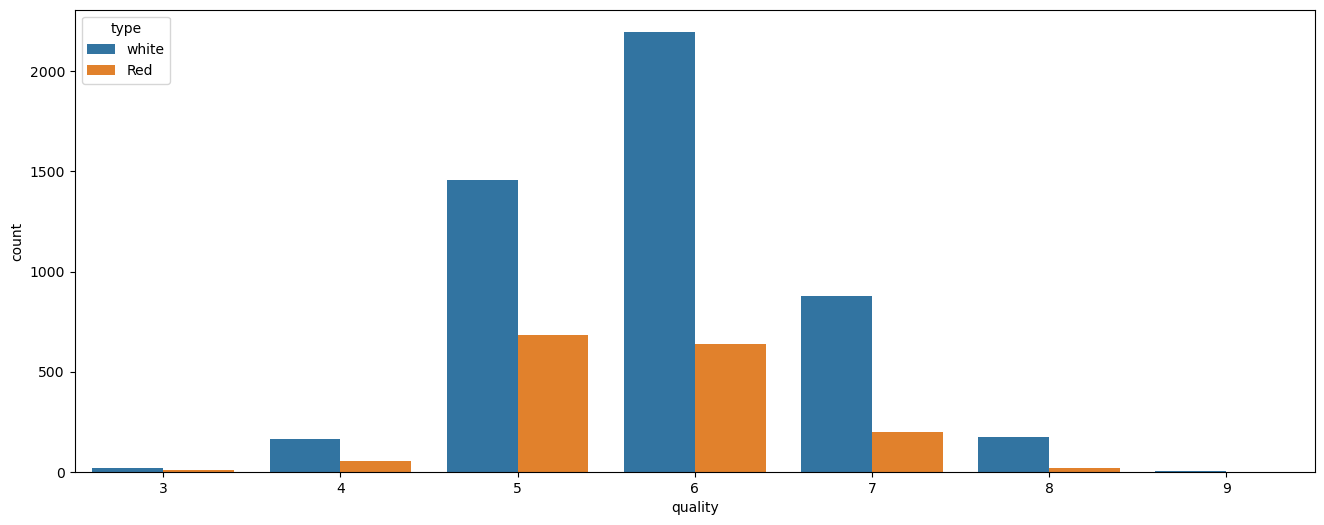

In [369]:
 
#The wine quality distribution according to type"
plt.figure(figsize = (16,6))
sns.countplot(x=wines['quality'], hue = wines['type']);

### To get more information about data we can analyze the data by visualization for example plot for finding citric acid in different types of quality of the wine.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

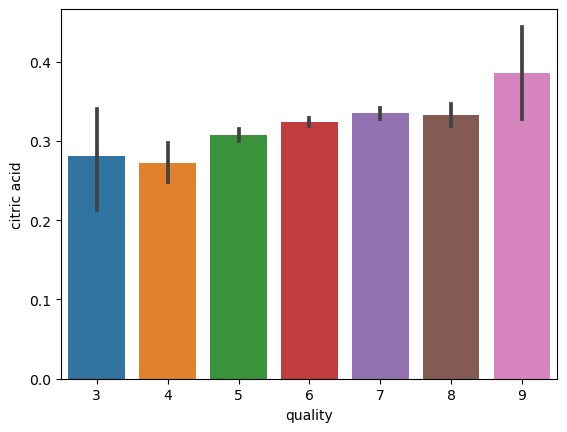

In [370]:
sns.barplot(x='quality',y='citric acid',data=wines)

In [371]:
wines["quality"].value_counts() # the amount of wine we have from each quality number

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Text(0, 0.5, 'Wine Alcohol %')

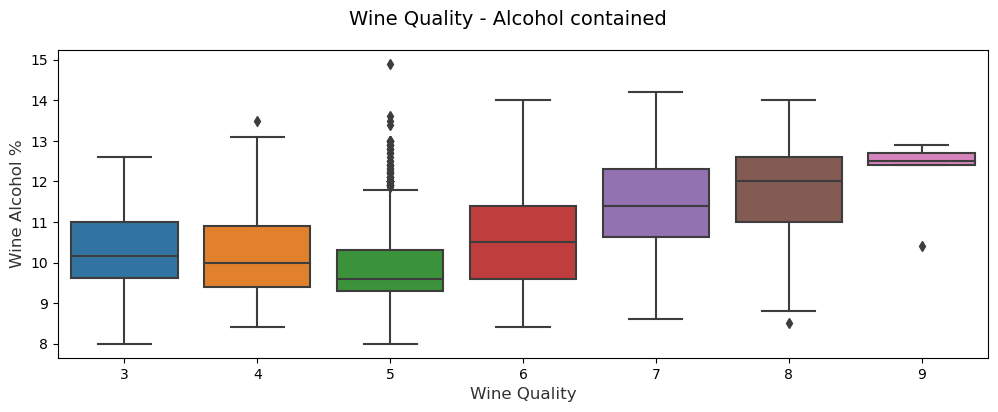

In [372]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol contained', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

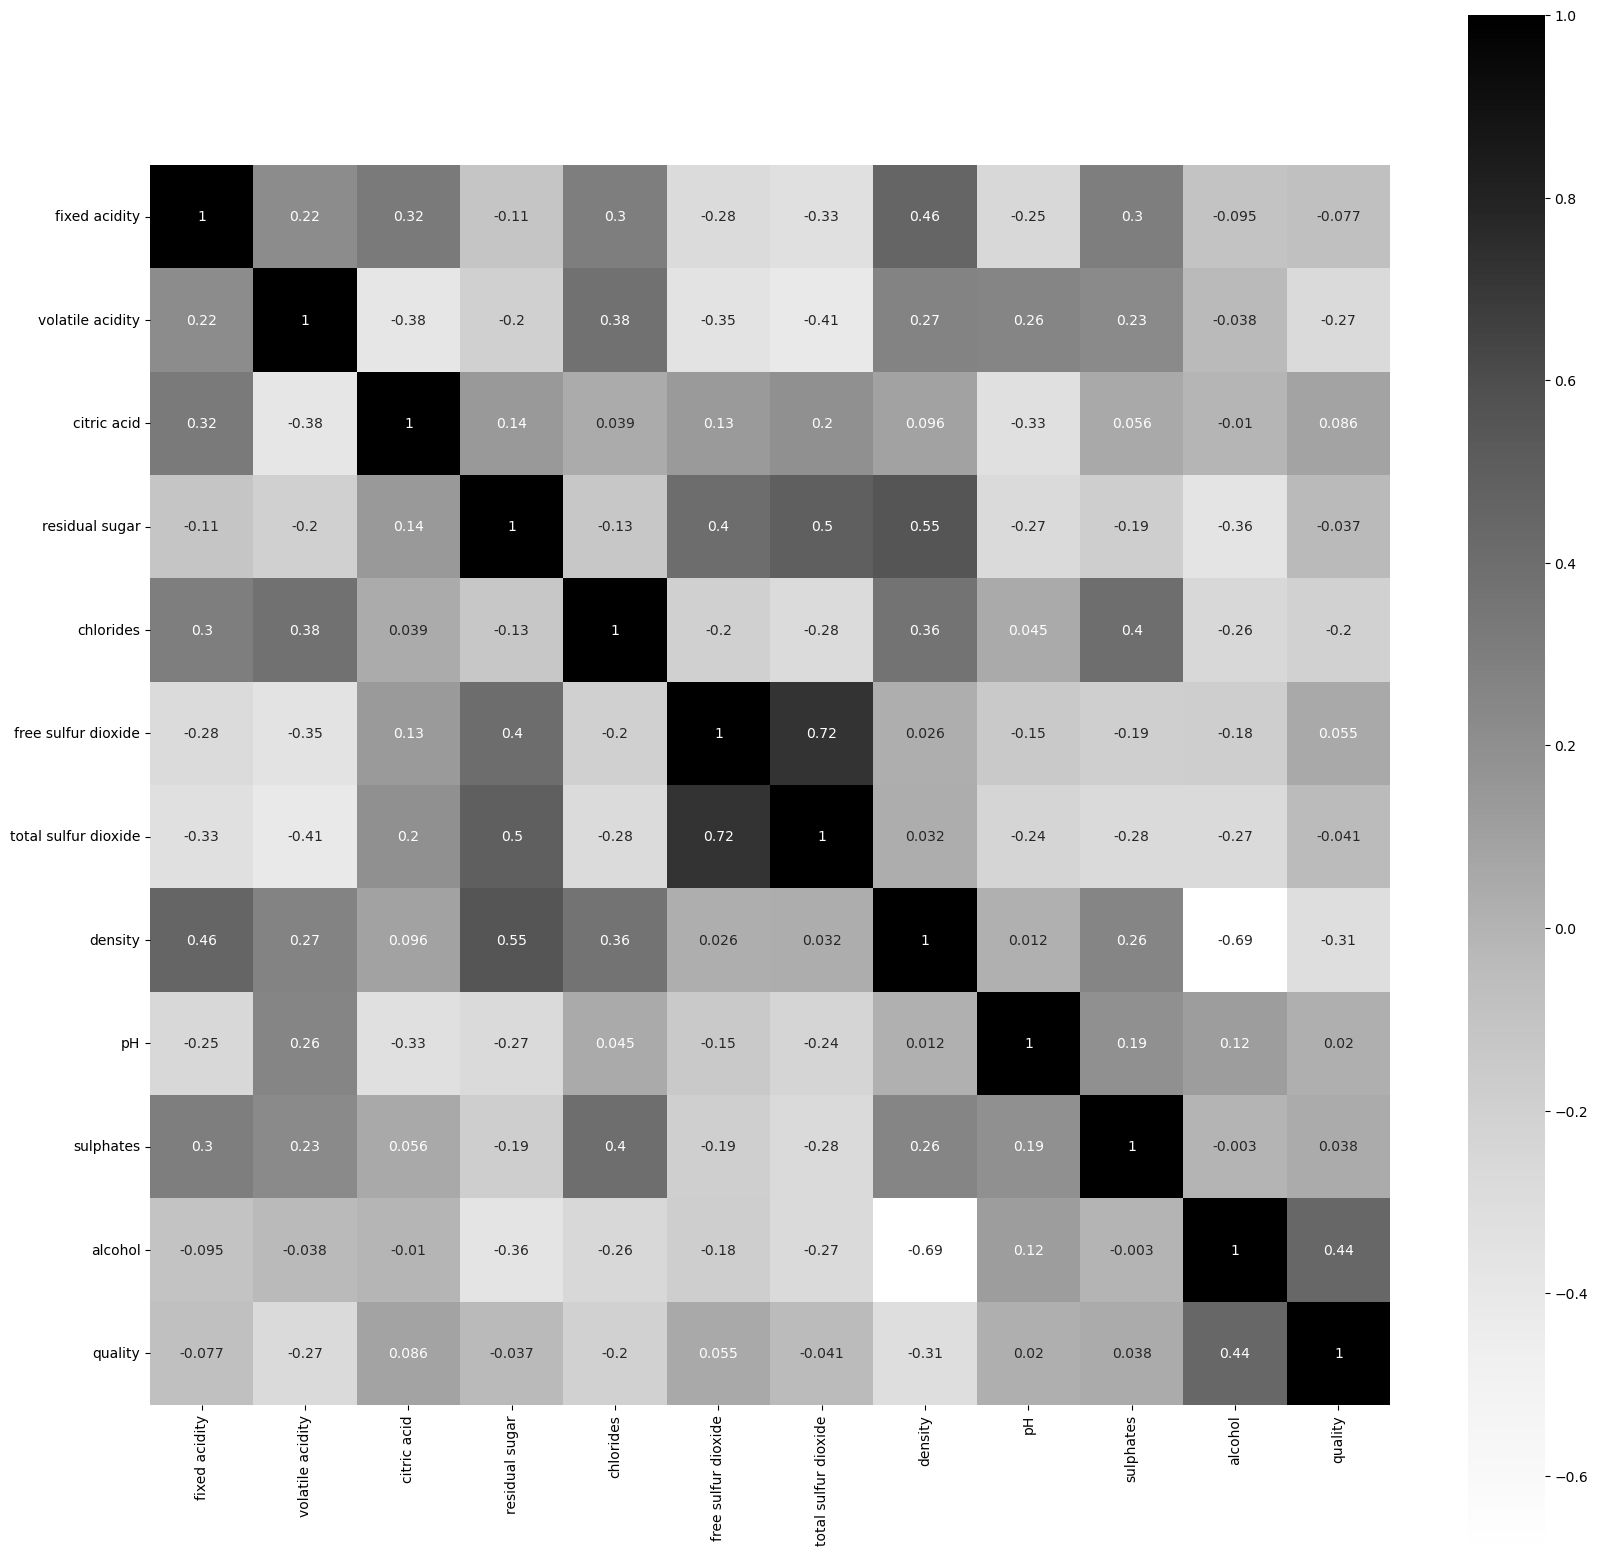

In [373]:
#I want to know the correalation between each feature
plt.figure(figsize=(20, 20))
sns.heatmap(wines.corr(), square=True, annot=True, cmap="Greys");

In [374]:
wines_df.describe() # more info about our dataset before the models part

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,7.504061e-17,1.801442e-16,5.536590e-18,5.394758e-17,1.264530e-18,1.551612e-17,-1.380730e-17,2.534186e-17,-5.331531e-17,4.707597e-17,3.622707e-18,-1.716685e-16
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.634589e+00,-1.577330e+00,-2.192833e+00,-1.018034e+00,-1.342639e+00,-1.663599e+00,-1.941787e+00,-2.530192e+00,-3.100615e+00,-2.091935e+00,-2.089350e+00,-3.227687e+00
25%,-6.289329e-01,-6.661613e-01,-4.723335e-01,-7.657978e-01,-5.147986e-01,-7.620866e-01,-6.855363e-01,-7.859527e-01,-6.748622e-01,-6.805919e-01,-8.316152e-01,-9.372296e-01
50%,-1.660892e-01,-3.016939e-01,-5.941375e-02,-5.135612e-01,-2.578826e-01,-8.595210e-02,3.990402e-02,6.448888e-02,-5.287424e-02,-1.429373e-01,-1.608231e-01,2.079990e-01
75%,3.738951e-01,3.664962e-01,4.911459e-01,5.584445e-01,2.559494e-01,5.901824e-01,7.122633e-01,7.648525e-01,6.313125e-01,4.619241e-01,6.776670e-01,2.079990e-01
max,6.699425e+00,7.534354e+00,9.231281e+00,1.268682e+01,1.584219e+01,1.456363e+01,5.737264e+00,1.476879e+01,4.923029e+00,9.870879e+00,3.696231e+00,3.643685e+00


### Data Splitting and scaling
#### Now we get X as input and y as a target of data than splitting data into train and test data.

In [375]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
ss = StandardScaler()
df = wines_df
df[features] = ss.fit_transform(df[features])
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,-0.166089,-1.030629,2.899845,1.546371,-0.314975,-0.367675,0.181453,-0.165631,0.258120,-1.016626,1.432308,2.498456,white,NaN
1,0.373895,1.824366,-0.747613,-0.681719,0.598504,0.083082,0.305309,0.301278,0.320319,-0.546178,-0.496219,-0.937230,Red,low
2,-0.320370,0.305752,0.147046,0.411306,-1.028631,0.421149,0.305309,-0.859324,-0.239471,-0.613385,1.264610,1.353228,white,NaN


In [376]:
#df['type']=df['type'].map({'red':0,'white':1})
#df

### Split Test/ Train

In [377]:
X=wines.drop("quality",axis=1)
y=wines['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=51)

In [378]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'quality_label'],
      dtype='object')

In [379]:
# Split the output into a seperate set. 
X_new=df[['alcohol', 'density', 'volatile acidity', 'chlorides']]
Y_new=df[['quality']]

In [380]:
# Split the data into train and test set with 80:20 proportion
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=40)

In [381]:
# Preview the split dataset
X_train.head()

,alcohol,density,volatile acidity,chlorides
908,-0.328521,1.268447,4.163031,0.684143
3131,-1.502407,-0.365735,-0.909139,1.883084
2585,-0.999313,0.434681,0.366496,-0.086605
3375,-0.076974,-0.899345,-0.787650,-0.571891
4444,0.258422,1.135045,0.609474,0.198857


In [382]:
Y_train.head()

,quality
908,-0.937230
3131,0.207999
2585,-0.937230
3375,-0.937230
4444,0.207999


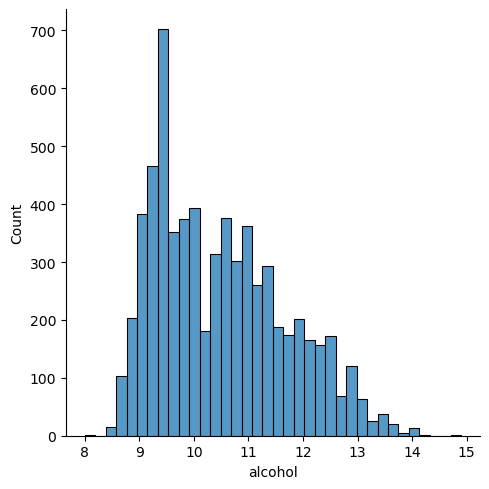

In [383]:
sns.displot(wines.alcohol) 

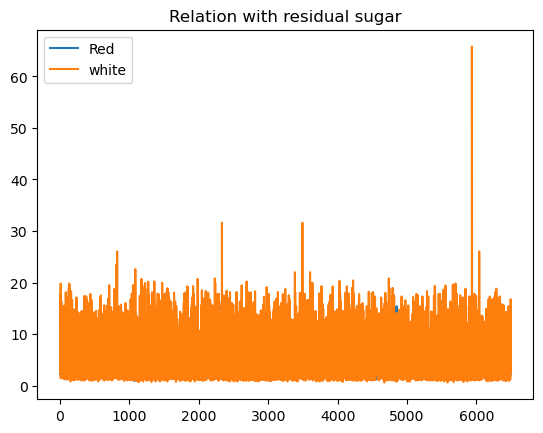

In [384]:
wines.groupby('type')['residual sugar'].plot(title="Relation with residual sugar", legend=True);

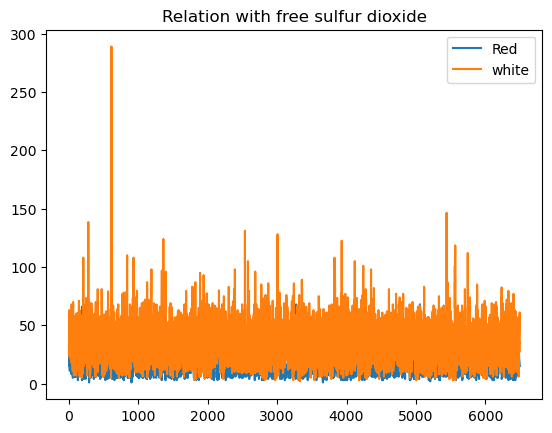

In [385]:
wines.groupby('type')['free sulfur dioxide'].plot(title="Relation with free sulfur dioxide", legend=True);

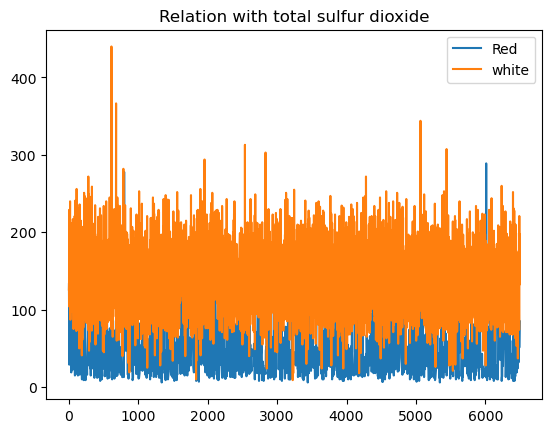

In [386]:
# the difference between the red and white wine
#observation:outliers
wines.groupby('type')['total sulfur dioxide'].plot(title="Relation with total sulfur dioxide", legend=True);

In [320]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
ss = StandardScaler()
df = wines
df[features] = ss.fit_transform(df[features])
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,-0.166089,-1.030629,2.899845,1.546371,-0.314975,-0.367675,0.181453,-0.165631,0.258120,-1.016626,1.432308,2.498456,white,NaN
1,0.373895,1.824366,-0.747613,-0.681719,0.598504,0.083082,0.305309,0.301278,0.320319,-0.546178,-0.496219,-0.937230,Red,low
2,-0.320370,0.305752,0.147046,0.411306,-1.028631,0.421149,0.305309,-0.859324,-0.239471,-0.613385,1.264610,1.353228,white,NaN


In [321]:
target=df['type'] # the feature we would like to predict, the type of the wine
data=df.drop(['type'], axis = 1) # we will drop y from x, because we want to predict it
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state=0) #train\test split

In [324]:
X_train.shape

(4872, 13)

In [325]:
y_train.shape

(4872,)

In [326]:
X_test.shape

(1625, 13)

In [327]:
y_test.shape

(1625,)

In [328]:
X_new=df[['alcohol', 'density', 'volatile acidity', 'chlorides']]
Y_new=df[['quality']]

In [332]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=60)

In [333]:
X_train.head()

,alcohol,density,volatile acidity,chlorides
2395,-0.915464,0.738172,-0.544672,-0.200790
4857,1.935402,-1.686420,-0.119460,-0.143698
5546,-0.831615,0.294608,1.763621,1.055244
59,-0.328521,-0.299033,-0.848395,-0.457706
939,0.426120,-1.319563,-0.969884,-0.628984


In [334]:
Y_train.head()

,quality
2395,0.207999
4857,0.207999
5546,-0.937230
59,-0.937230
939,0.207999


In [341]:
from sklearn.preprocessing import StandardScaler
X_newfeatures =wines
X_new = StandardScaler().fit_transform(X_new)

In [342]:
X_newfeatures.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,-0.166089,-1.030629,2.899845,1.546371,-0.314975,-0.367675,0.181453,-0.165631,0.258120,-1.016626,1.432308,2.498456,white,NaN
1,0.373895,1.824366,-0.747613,-0.681719,0.598504,0.083082,0.305309,0.301278,0.320319,-0.546178,-0.496219,-0.937230,Red,low
2,-0.320370,0.305752,0.147046,0.411306,-1.028631,0.421149,0.305309,-0.859324,-0.239471,-0.613385,1.264610,1.353228,white,NaN
3,-0.706073,-0.362438,1.041706,1.210056,-0.457706,1.717073,1.189992,0.408001,-0.612663,-0.142937,-0.831615,0.207999,white,NaN
4,0.142473,0.062773,-0.816433,1.777588,-0.058059,1.829762,2.003901,1.395180,-0.674862,-0.210144,-1.334709,0.207999,white,NaN


# Comments
As the data has been processed, for better accuracy we gonna procced with studying further our data by applying

- Linear Regression

- Polynominal Regression